# Parcial 2: Introducción a la Ciencia de Datos práctica

&emsp; **Asignatura:** Big Data. <br>
&emsp; **Profesor:** Juan Martín Londoño Zuluaga. <br>
&emsp; **Período:** 2024-I.

&emsp; **Estdiante:** <indique su nombre aquí>

Usted es contratada/o como analista para un Banco: FULL Credit. El CEO le recibe personalmente y le agradece su tiempo. El CEO quiere conocer profundamente cómo se comporta su negocio, por eso le envía los datos en el siguiente [enlace](https://www.kaggle.com/datasets/tanayatipre/car-price-prediction-dataset/data).

Tras unos cuantos tés, le extiende sus preocupaciones:

# 1. Importe de los datos (5 puntos)

Importe los datos del archivo `spotify-2023.csv`:

In [3]:
import pandas as pd

credit = pd.read_csv('datain/test_data.csv')

# 2. Calidad de la base de datos (5 puntos)

## 2.1. Valores perdidos

Encuentre el número y porcentaje respecto al total de los valores perdidos que tiene la base de datos:
* ¿Qué nivel de pérdida de datos se tiene?
* ¿Es significativa la pérdida de datos?
* Si sí, ¿qué estrategia propone para afrontarlo?

In [4]:
credit.isnull().sum()/len(credit)

ID                     0.000000
Gender                 0.000000
Has a car              0.000000
Has a property         0.000000
Children count         0.000000
Income                 0.000000
Employment status      0.000000
Education level        0.000000
Marital status         0.000000
Dwelling               0.000000
Age                    0.000000
Employment length      0.000000
Has a mobile phone     0.000000
Has a work phone       0.000000
Has a phone            0.000000
Has an email           0.000000
Job title              0.314866
Family member count    0.000000
Account age            0.000000
Is high risk           0.000000
dtype: float64

## 2.2. Valores únicos

Encuentre el número de valores únicos por columna:

In [5]:
credit.nunique()

ID                     7292
Gender                    2
Has a car                 2
Has a property            2
Children count            7
Income                  190
Employment status         5
Education level           5
Marital status            5
Dwelling                  6
Age                    3988
Employment length      2429
Has a mobile phone        1
Has a work phone          2
Has a phone               2
Has an email              2
Job title                18
Family member count       8
Account age              61
Is high risk              2
dtype: int64

In [6]:
for var in credit.columns:
    print(var)
    print(credit[var].unique())
    print("\n")


ID
[5091261 5096963 5087880 ... 5026088 5142701 5022903]


Gender
['F' 'M']


Has a car
['N' 'Y']


Has a property
['Y' 'N']


Children count
[ 0  1  2  3  4  5 14]


Income
[ 202500.   675000.   234000.   445500.   225000.    94500.   180000.
   67500.   189000.   157500.   292500.    54000.   405000.    90000.
  247500.   135000.   171000.    33300.   252000.   256500.   315000.
  562500.   112500.   270000.    99000.   121500.   360000.   306000.
  126000.   103500.   198000.   229500.   220500.   450000.   297000.
  387000.    72000.   193500.    85500.   140400.   117000.   144000.
   95850.   166500.    40500.   333000.    76500.   148500.   162000.
  153000.   585000.   382500.   216000.    81000.   207000.   122400.
  427500.    78750.    37800.   119250.   184500.   337500.   414000.
  130500.   167400.   324000.   540000.   123750.    63000.   261000.
  254700.  1350000.   616500.   211500.   900000.   175500.   274500.
  190399.5  110250.   139500.    58500.   279000.   2677

# 3. Análisis descriptivo (15 puntos)

El CEO de la empresa le hace las siguientes preguntas:

* ¿Cuál es el porcentaje de personas entre los datos con carro? ¿Cuál es el porcentaje de personas con propiedades? Relice dos tablas y expórtelas en formato .xlsx.
* ¿Cuál es el porcentaje de mujeres con propiedades y cuál es el porcentaje de hombres con propiedades? ¿Difieren entre ellos significativamente?
* Realice un análisis sobre la distribución de los ingresos.

In [7]:
tabla = (
    credit[['Gender', 'Employment status']]
    .value_counts()
    .reset_index()
    .sort_values('Gender')
)

tabla

,Gender,Employment status,count
0,F,Working,2283
2,F,Commercial associate,1092
3,F,Pensioner,1047
5,F,State servant,456
8,F,Student,3
1,M,Working,1480
4,M,Commercial associate,597
6,M,Pensioner,185
7,M,State servant,148
9,M,Student,1


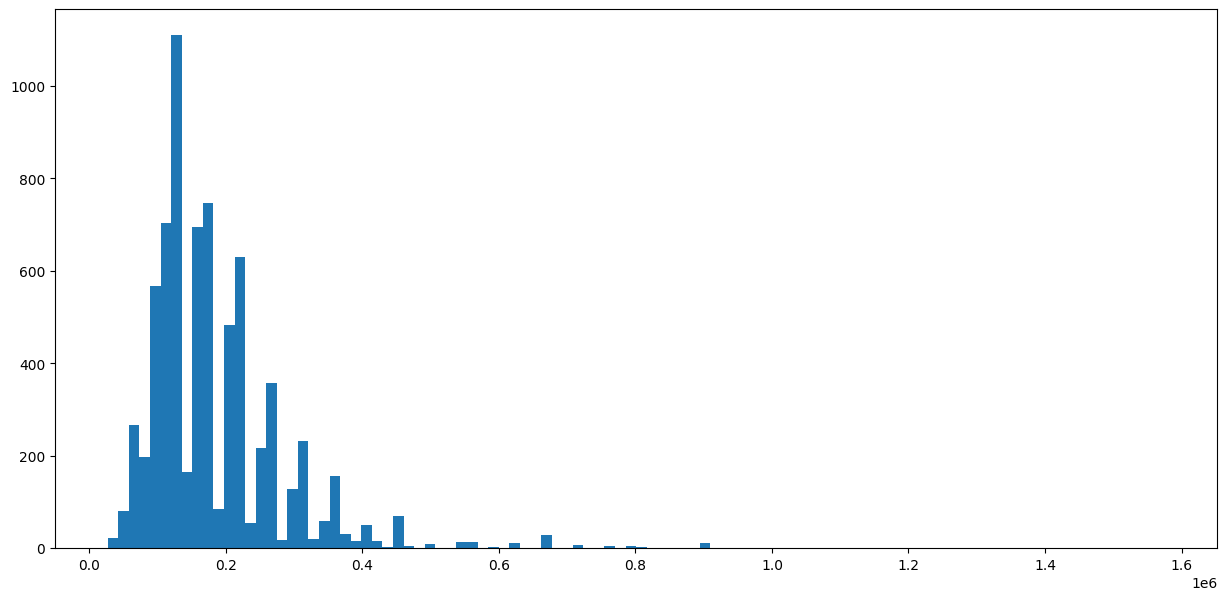

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

tabla = (
    credit['Income']
    .value_counts()
    .reset_index()
)

tabla

plt.figure(figsize = (15, 7))
plt.hist(credit['Income'], bins = 100)
plt.show()

In [9]:
credit.columns

Index(['ID', 'Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email', 'Job title',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

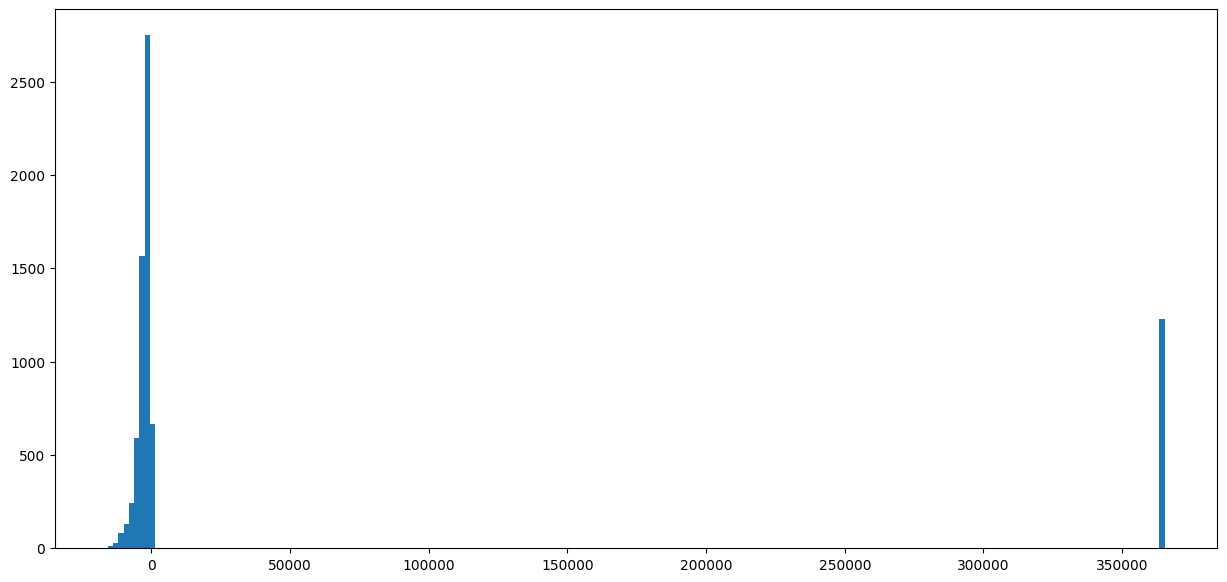

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

tabla = (
    credit['Education level']
    .value_counts()
    .reset_index()
)

tabla

plt.figure(figsize = (15, 7))
plt.hist(credit['Employment length'], bins = 200)
plt.show()

# 4. Análisis prescriptivo (25 puntos)

El CEO le interesa saber dos cosas puntuales:

* En primer lugar, al CEO le interesa saber cuáles son las variables que más influyen en que exista un riesgo de impago de crédito. Por ello le pregunta: ¿cuáles son las variables que más contribuyen al riesgo de los prestadores?
* En segundo lugar, al CEO le interesa evitar problemas de discriminación de género. Por ello le pregunta si identifica algún fenómeno con los datos que le pueda dar pistas sobre cómo prevenir este tipo de discriminación.

In [25]:
# Creamos las dummies
vars_to_dummies = ['Gender', 'Has a car', 'Has a property', 'Education level', 'Marital status', 
                   'Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email', 'Job title',
                   'Is high risk', 'Income', 'Children count', 'Family member count', 'Account age']
credit_ohe = pd.get_dummies(credit[vars_to_dummies], drop_first=True)

# Seleccionando las variables numericas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_corr = credit_ohe

# Creando una lista de correlaciones
corr    = df_corr.corr()
pos_cor = corr['Is high risk'] > 0
neg_cor = corr['Is high risk'] < 0

# Correlación positiva por valor mayor positivo
corr['Is high risk'][pos_cor].sort_values(ascending = False).head(10)

Is high risk                         1.000000
Marital status_Widow                 0.034139
Education level_Incomplete higher    0.025467
Job title_Core staff                 0.023225
Job title_Low-skill Laborers         0.021603
Gender_M                             0.012332
Education level_Higher education     0.011454
Job title_Drivers                    0.010942
Has a phone                          0.008583
Has a work phone                     0.007891
Name: Is high risk, dtype: float64

In [62]:
# Correlación positiva por valor mayor positivo
corr['Is high risk'][neg_cor].sort_values(ascending = True).head(10)

Account age                       -0.063273
Has a property_Y                  -0.025659
Marital status_Married            -0.013085
Job title_Medicine staff          -0.010924
Job title_Private service staff   -0.010474
Family member count               -0.006252
Job title_Realty agents           -0.005990
Marital status_Separated          -0.005952
Job title_Cooking staff           -0.005817
Job title_Sales staff             -0.005809
Name: Is high risk, dtype: float64

In [65]:
corr

,Has a mobile phone,Has a work phone,Has a phone,Has an email,Is high risk,Income,Children count,Family member count,Account age,Gender_M,...,Job title_Laborers,Job title_Low-skill Laborers,Job title_Managers,Job title_Medicine staff,Job title_Private service staff,Job title_Realty agents,Job title_Sales staff,Job title_Secretaries,Job title_Security staff,Job title_Waiters/barmen staff
Has a mobile phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Has a work phone,NaN,1.000000,0.312419,-0.035741,0.005115,-0.036601,0.048727,0.065130,-0.009882,0.061030,...,0.042418,0.025208,0.044301,0.006721,-0.003645,-0.000832,0.030822,0.005902,0.002575,0.024359
Has a phone,NaN,0.312419,1.000000,0.011367,-0.000112,0.021516,-0.015110,-0.002008,-0.013896,-0.029348,...,-0.027933,0.004704,0.003424,-0.004644,0.007115,0.007138,0.012055,0.001180,-0.023957,-0.007379
Has an email,NaN,-0.035741,0.011367,1.000000,-0.004659,0.091500,0.015116,0.013759,0.002588,-0.001559,...,-0.024994,-0.009517,0.035268,0.009873,0.020714,0.004181,0.001083,0.003681,0.007755,-0.006297
Is high risk,NaN,0.005115,-0.000112,-0.004659,1.000000,-0.001760,0.000369,-0.006252,-0.063273,0.016015,...,-0.003939,0.014020,-0.003295,-0.010924,-0.010474,-0.005990,-0.005809,-0.000358,0.006469,-0.004710
Income,NaN,-0.036601,0.021516,0.091500,-0.001760,1.000000,0.034991,0.025338,-0.016435,0.196511,...,-0.034607,-0.032976,0.268531,-0.035327,0.011754,0.029454,-0.037415,-0.010958,-0.011200,-0.020600
Children count,NaN,0.048727,-0.015110,0.015116,0.000369,0.034991,1.000000,0.888676,-0.003722,0.077620,...,0.035836,-0.000976,0.046331,0.002638,0.008598,0.000156,0.037882,0.005330,0.000042,0.014242
Family member count,NaN,0.065130,-0.002008,0.013759,-0.006252,0.025338,0.888676,1.000000,-0.021693,0.112225,...,0.032857,0.008622,0.059606,0.004678,-0.009783,0.009248,0.034888,-0.002387,0.003108,-0.000049
Account age,NaN,-0.009882,-0.013896,0.002588,-0.063273,-0.016435,-0.003722,-0.021693,1.000000,-0.000095,...,0.018674,0.004758,-0.022455,-0.013611,0.011494,0.004923,0.026219,0.005311,-0.000434,0.011829
Gender_M,NaN,0.061030,-0.029348,-0.001559,0.016015,0.196511,0.077620,0.112225,-0.000095,1.000000,...,0.245523,0.066427,0.090510,-0.115186,-0.055880,-0.017357,-0.132603,-0.042066,0.104931,-0.022013
